<a href="https://colab.research.google.com/github/rocket0l4/ML-files/blob/main/Random_Forest_Combined_Row_and_column.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [ ]:
X,y = make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [ ]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.195683,-2.293744,-0.899459,1.053069,1.558860,1
1,-2.019815,-1.608170,1.738487,1.768544,0.856663,1
2,1.857060,-0.339510,0.425849,1.690546,-1.799145,0
3,1.541323,-3.440285,-1.250490,3.570358,0.120787,1
4,-1.617373,-2.570060,1.689700,2.991558,1.222514,1


In [ ]:
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [ ]:
#column sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [ ]:
#combined sampling
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [ ]:
df1 = combined_sampling(df,0.5,0.5)

<ipython-input-46-42fdf4adb6da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [ ]:
df2 = combined_sampling(df,0.5,0.5)

<ipython-input-46-42fdf4adb6da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [ ]:
df3 = combined_sampling(df,0.5,0.5)

<ipython-input-46-42fdf4adb6da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [ ]:
combined_sampling(df,0.5,0.5)

<ipython-input-46-42fdf4adb6da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col3,col4,target
27,2.837110,3.100567,0
71,-1.056396,0.240156,1
30,0.398722,1.059729,0
14,-0.559375,-0.107510,0
19,-5.591278,-1.226238,1
83,0.782848,1.020793,0
58,4.028775,2.135466,1
33,0.598906,1.270751,1
22,2.296694,2.336584,0
97,-0.330460,3.084412,1


In [ ]:
df1.shape

(50, 3)

In [ ]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col5', 'target'], dtype='object')
Index(['col1', 'col5', 'target'], dtype='object')
Index(['col2', 'col4', 'target'], dtype='object')


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [ ]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [ ]:
from sklearn.tree import plot_tree

[Text(0.6, 0.8333333333333334, 'x[1] <= -0.17\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.4, 0.5, 'x[0] <= 0.102\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.7, 0.6666666666666667, '  False')]

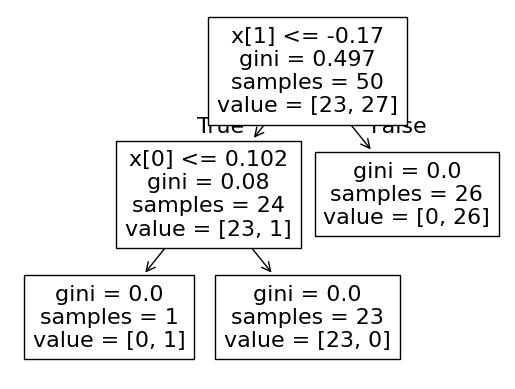

In [ ]:
plot_tree(clf1)

[Text(0.6071428571428571, 0.9, 'x[1] <= -0.097\ngini = 0.493\nsamples = 50\nvalue = [22.0, 28.0]'),
 Text(0.35714285714285715, 0.7, 'x[1] <= -1.353\ngini = 0.375\nsamples = 28\nvalue = [21, 7]'),
 Text(0.4821428571428571, 0.8, 'True  '),
 Text(0.21428571428571427, 0.5, 'x[0] <= 1.692\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.14285714285714285, 0.3, 'x[1] <= -1.8\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.07142857142857142, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21428571428571427, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.2857142857142857, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.5, 0.5, 'x[1] <= -0.738\ngini = 0.497\nsamples = 13\nvalue = [7, 6]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.5714285714285714, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.8571428571428571, 0.7, 'x[1] <= 0.675\ngini = 0.087\nsamples = 22\nvalue = [1, 21]'),
 Text(0.732142857142857

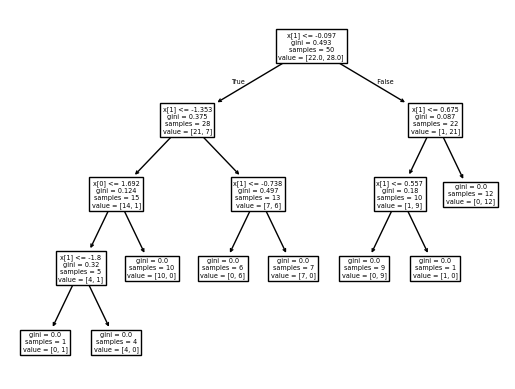

In [ ]:
plot_tree(clf2)

[Text(0.4230769230769231, 0.9166666666666666, 'x[0] <= -1.187\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.15384615384615385, 0.75, 'x[1] <= -0.826\ngini = 0.346\nsamples = 27\nvalue = [6, 21]'),
 Text(0.28846153846153844, 0.8333333333333333, 'True  '),
 Text(0.07692307692307693, 0.5833333333333334, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.23076923076923078, 0.5833333333333334, 'x[1] <= 1.305\ngini = 0.219\nsamples = 24\nvalue = [3, 21]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[0] <= -2.261\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.23076923076923078, 0.25, 'x[0] <= -1.712\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.15384615384615385, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3076923076923077, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3076923076923077, 0.4166666666666667, 'gini = 0.0\nsamples = 14

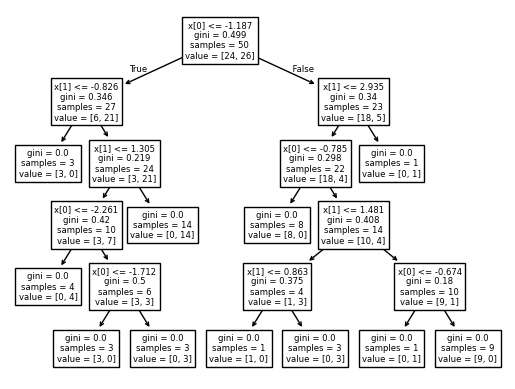

In [ ]:
plot_tree(clf3)

In [ ]:
clf1.predict(np.array([-0.559375, 	-0.107510]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
clf2.predict(np.array([-0.559375, 	-0.107510]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
clf3.predict(np.array([-0.559375, 	-0.107510]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])